In [1]:
import h2o
h2o.init(max_mem_size = 2)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,4 hours 34 mins
H2O cluster version:,3.10.3.4
H2O cluster version age:,8 months !!!
H2O cluster name:,H2O_from_python_unknownUser_ljpv4e
H2O cluster total nodes:,1
H2O cluster free memory:,1.404 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [2]:
h2o.remove_all()

In [3]:
get_ipython().magic(u'matplotlib inline')

In [4]:
import numpy as np
import pandas as pd
import os

from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator

In [5]:
credit_card_data = h2o.import_file(path = os.path.realpath("../data/fraud/creditcard.csv"))

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
credit_card_data.head()

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62,0
0,1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69,0
1,-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005,0.791461,0.247676,-1.51465,0.207643,0.624501,0.0660837,0.717293,-0.165946,2.34586,-2.89008,1.10997,-0.121359,-2.26186,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.0553528,-0.0597518,378.66,0
1,-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472,0.237609,0.377436,-1.38702,-0.0549519,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.05965,-0.684093,1.96578,-1.23262,-0.208038,-0.1083,0.0052736,-0.190321,-1.17558,0.647376,-0.221929,0.0627228,0.0614576,123.5,0
2,-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.34585,-1.11967,0.175121,-0.451449,-0.237033,-0.0381948,0.803487,0.408542,-0.0094307,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0
2,-0.425966,0.960523,1.14111,-0.168252,0.420987,-0.0297276,0.476201,0.260314,-0.568671,-0.371407,1.34126,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.0581328,0.0686531,-0.0331938,0.0849677,-0.208254,-0.559825,-0.0263977,-0.371427,-0.232794,0.105915,0.253844,0.0810803,3.67,0
4,1.22966,0.141004,0.0453708,1.20261,0.191881,0.272708,-0.005159,0.0812129,0.46496,-0.0992543,-1.41691,-0.153826,-0.751063,0.167372,0.0501436,-0.443587,0.00282051,-0.611987,-0.045575,-0.219633,-0.167716,-0.27071,-0.154104,-0.780055,0.750137,-0.257237,0.0345074,0.00516777,4.99,0
7,-0.644269,1.41796,1.07438,-0.492199,0.948934,0.428118,1.12063,-3.80786,0.615375,1.24938,-0.619468,0.291474,1.75796,-1.32387,0.686133,-0.076127,-1.22213,-0.358222,0.324505,-0.156742,1.94347,-1.01545,0.0575035,-0.649709,-0.415267,-0.0516343,-1.20692,-1.08534,40.8,0
7,-0.894286,0.286157,-0.113192,-0.271526,2.6696,3.72182,0.370145,0.851084,-0.392048,-0.41043,-0.705117,-0.110452,-0.286254,0.0743554,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.0527357,-0.0734251,-0.268092,-0.204233,1.01159,0.373205,-0.384157,0.0117474,0.142404,93.2,0
9,-0.338262,1.11959,1.04437,-0.222187,0.499361,-0.246761,0.651583,0.0695386,-0.736727,-0.366846,1.01761,0.83639,1.00684,-0.443523,0.150219,0.739453,-0.54098,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.38505,-0.069733,0.0941988,0.246219,0.0830756,3.68,0


In [7]:
credit_card_data_df = credit_card_data.as_data_frame(use_pandas = True)

In [8]:
credit_card_data_df['Class'].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

## Data Exploration ...

Class
0    284315
1       492
Name: Counter_on_Class, dtype: int64


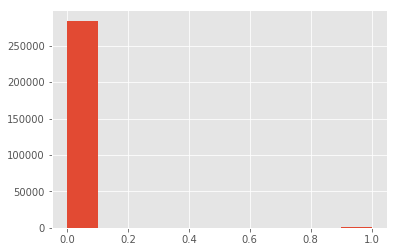

In [9]:
import matplotlib.pyplot as plt

credit_card_data_df['Counter_on_Class'] =1
print(credit_card_data_df.groupby(['Class'])['Counter_on_Class'].sum())

plt.style.use('ggplot')
credit_card_data_df['Class'].hist()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd913697c50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fd9136145d0>], dtype=object)

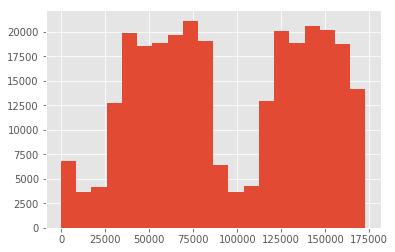

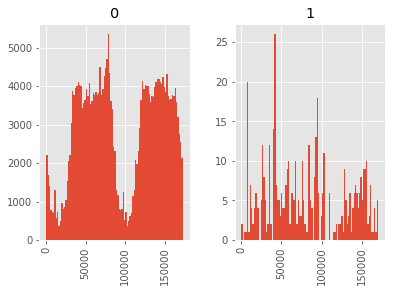

In [12]:
# Feature: Time is in seconds 1hr = 60*60 = 3600sec
# 1day = 24*3600 =  86,400          
print(credit_card_data_df['Time'].describe())
credit_card_data_df['Time'].hist(bins=20)
credit_card_data_df['Time'].hist(bins=100, by=credit_card_data_df['Class'])
#or credit_card_data_df['Time'].plot(kind='hist', alpha=0.5)

In [39]:
credit_card_data_df.groupby(['Time', 'Class']).size().reset_index(name='Counter').head()

,Time,Class,Counter
0,0,0,2
1,1,0,2
2,2,0,2
3,4,0,1
4,7,0,2


In [ ]:
# import matplotlib.cm as cm
# gg = credit_card_data_df.groupby(['Time', 'Class']).sum().unstack()

In [ ]:
# gg.columns = gg.columns.droplevel()
# gg.plot(kind = 'bar', colormap = cm.Accent, width = 1)

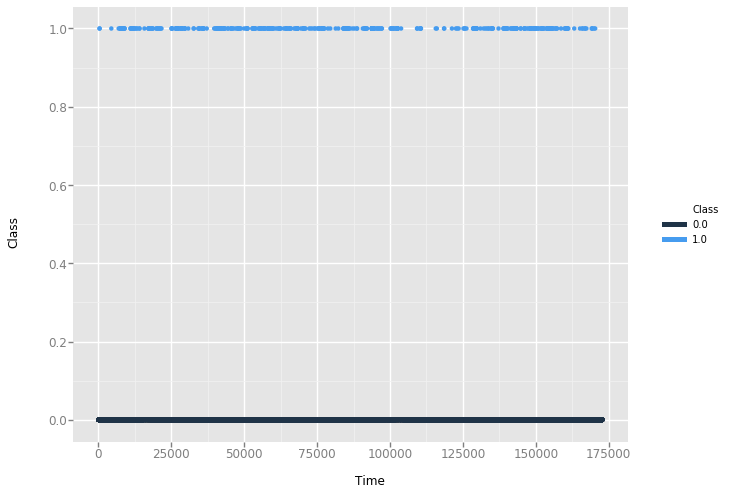

<ggplot: (8785624934465)>

In [14]:
# Visualize the class distribution ...
from ggplot import *
ggplot(aes(x='Time', y='Class', color='Class'), data=credit_card_data_df) + geom_point()

In [20]:
print("Class 0")
print(credit_card_data_df[credit_card_data_df['Class'] == 0]['Amount'].describe())
print("Class 1")
print(credit_card_data_df[credit_card_data_df['Class'] == 1]['Amount'].describe())

Class 0
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
Class 1
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [32]:
credit_card_data_df[credit_card_data_df.columns.difference(['Class'])].head(2)

,Amount,Counter_on_Class,Time,V1,V10,V11,V12,V13,V14,V15,...,V26,V27,V28,V3,V4,V5,V6,V7,V8,V9
0,149.62,1,0,-1.359807,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,...,-0.189115,0.133558,-0.021053,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787
1,2.69,1,0,1.191857,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,...,0.125895,-0.008983,0.014724,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425


In [35]:
credit_card_h2o_frame = h2o.H2OFrame(credit_card_data_df)
train, valid, test = credit_card_h2o_frame.split_frame(ratios=[0.6, 0.2], seed=0)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [34]:
model = H2OAutoEncoderEstimator(activation="Tanh", hidden=[50, 50, 50],
                                ignore_const_cols=False, epochs=100)

In [ ]:
model.train(x=credit_card_h2o_frame.col_names, training_frame=credit_card_h2o_frame)